In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

### Build and Evaluate a Linear Model

In [2]:
cars_df = pd.read_csv('../data/cars.csv')
print('The shape of cars_df is',cars_df.shape)
cars_df.head(2)

The shape of cars_df is (32, 12)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [3]:
cars_df = cars_df.rename(columns = {'Unnamed: 0': 'model'})
cars_df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Also, higher horsepower usually corresponds to lower mpg.

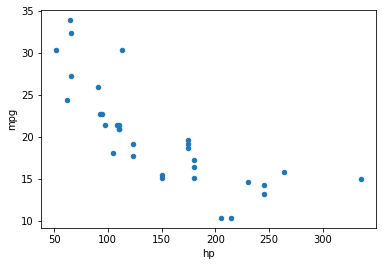

In [4]:
cars_df.plot(kind = 'scatter', x = 'hp', y = 'mpg');

In [5]:
X = cars_df[['hp']]
y = cars_df.mpg

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
linear_model.coef_

array([-0.06230406])

Based on the coefficient, our linear model says that for every additional horsepower, the mpg drops by about 0.062 mpg.

In [9]:
x_reg = [X.min(), X.max()]
y_reg = linear_model.predict(x_reg)

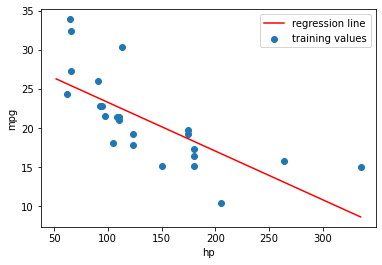

In [10]:
plt.scatter(X_train, y_train, label = 'training values')
plt.plot(x_reg, y_reg, color = 'red', label = 'regression line')
plt.legend()
plt.xlabel('hp')
plt.ylabel('mpg');

We know that the model will do decently well on the training set, but how does it perform on unseen data?

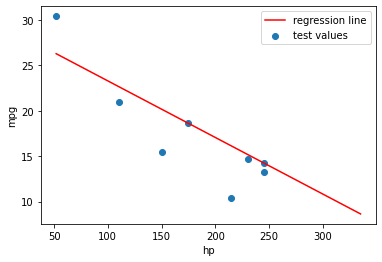

In [11]:
plt.scatter(X_test, y_test, label = 'test values')
plt.plot(x_reg, y_reg, color = 'red', label = 'regression line')
plt.legend()
plt.xlabel('hp')
plt.ylabel('mpg');

In [12]:
y_pred = linear_model.predict(X_test)

We can quantify how well our model performs in a number of ways.

### MAE

The mean absolute error, or MAE, measures the average "residual" magnitude.

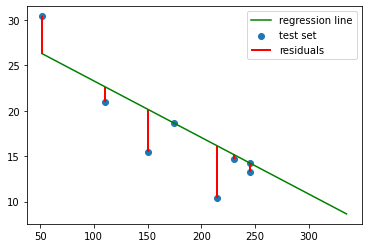

In [13]:
lines = [[(a,b),(a,c)] for a,b,c in zip(X_test.hp,y_test,y_pred)]
lc = mc.LineCollection(lines, linewidths=2, colors = 'red', label = 'residuals')
fig, ax = plt.subplots()
plt.scatter(X_test,y_test, label = 'test set')
plt.plot(x_reg,y_reg, c = 'green', label = 'regression line')
ax.add_collection(lc)
plt.legend();

In [14]:
metrics.mean_absolute_error(y_test, y_pred)

2.21961258630809

### MSE and RMSE

The mean squared error (MSE) measures the average squared residual, and the root mean squared error (RMSE) is the square root of the MSE.

In [15]:
metrics.mean_squared_error(y_test, y_pred)

9.439663070460774

In [16]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.072403468045949

### $R^2$

The $R^2$ values of a regression model measures the proportion of variance in the response variable that is "explained" by the predictor variable. A perfect model has an $R^2$ of 1.

In [17]:
metrics.r2_score(y_test, y_pred)

0.7201702510435677

There is no reason that me must only predict based on one variable. We can also built a multiple regression model.

In [18]:
X = cars_df.drop(columns = ['mpg', 'model'])
y = cars_df.mpg

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

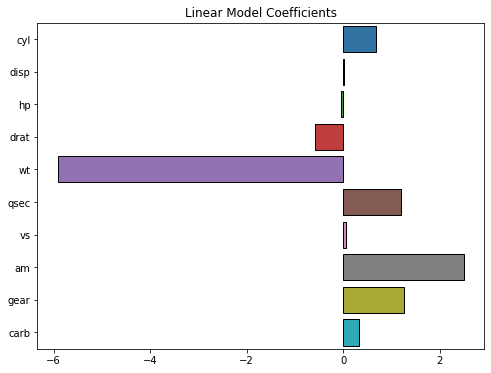

In [21]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(x = linear_model.coef_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Linear Model Coefficients');

In [22]:
y_pred = linear_model.predict(X_test)

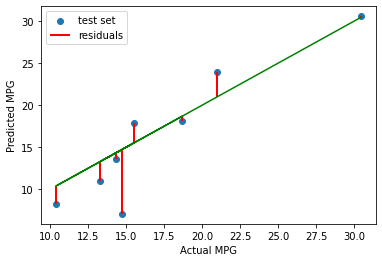

In [23]:
lines = [[(a,b),(a,a)] for a,b in zip(y_test,y_pred)]

lc = mc.LineCollection(lines, linewidths=2, colors = 'red', label = 'residuals')
fig, ax = plt.subplots()

plt.scatter(y_test, y_pred, label = 'test set')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
ax.add_collection(lc)

plt.plot(y_test, y_test, color = 'green')

plt.legend();

In [24]:
metrics.mean_absolute_error(y_test, y_pred)

2.3621519135895452

In [25]:
metrics.mean_squared_error(y_test, y_pred)

10.40373973910615

In [26]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.225482869138534

In [27]:
metrics.r2_score(y_test, y_pred)

0.6915911237857322

In [28]:
cars_df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


### Build and Evaluate a Logistic Regression Model

In [29]:
titanic = pd.read_csv('../data/titanic.csv')

In [30]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [31]:
titanic.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

We can see that 342 passengers survived and 545 died.

In [32]:
titanic.Survived.value_counts(normalize = True)

0    0.614431
1    0.385569
Name: Survived, dtype: float64

61% of passengers died.

In [33]:
titanic.groupby(['Pclass', 'Survived']).Survived.count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
Name: Survived, dtype: int64

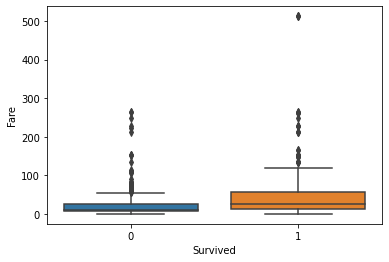

In [34]:
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic);

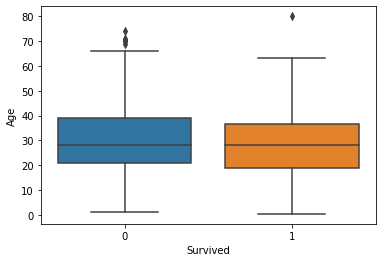

In [35]:
sns.boxplot(x = 'Survived', y = 'Age', data = titanic);

Currently, sex is encoded as a string. We need to encode it numerically so that we can build a model based of it.

In [36]:
titanic = titanic.drop(columns = 'Name')
titanic = pd.get_dummies(titanic, columns = ['Sex'], drop_first = True)

In [37]:
titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [38]:
X = titanic.drop(columns = 'Survived')
y = titanic.Survived

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

In [40]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

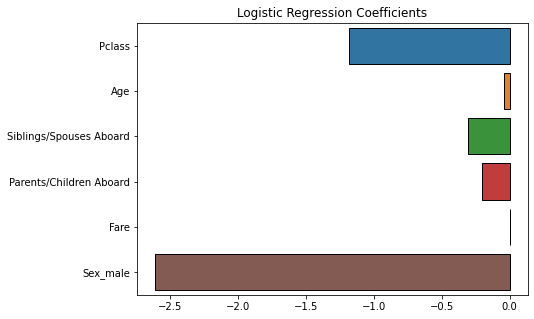

In [41]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = logistic_model.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients');

In [42]:
y_pred = logistic_model.predict(X_test)

In [43]:
print(metrics.accuracy_score(y_test, y_pred))

0.8243243243243243


The naive model which predicts that all passengers died, would only be correct 62% of the time, so our model is significantly better than the naive one.

In [44]:
y_test.value_counts(normalize=True)

0    0.626126
1    0.373874
Name: Survived, dtype: float64

In [45]:
print('                 Pred Died:  Pred Survived:')
print('    Actual Died:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('Actual Survived:    ', metrics.confusion_matrix(y_test, y_pred)[1])

                 Pred Died:  Pred Survived:
    Actual Died:     [123  16]
Actual Survived:     [23 60]


**Sensitivity/True Positive Rate:** The proportion of true positives (in our case, people who survived) that are identified as such.

In [46]:
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

sensitivity:
0.7228915662650602


**Specificity/True Negative Rate:** The proportion of true negatives (in our case, people who died) that are identified as such.

In [47]:
print('specificity:')
print(124 / (124 + 15))

specificity:
0.8920863309352518


**Precision:** The proportion of predicted positives that are actually positive (survived).

In [48]:
print('precision:')
print(metrics.precision_score(y_test, y_pred))

precision:
0.7894736842105263


In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.79      0.72      0.75        83

    accuracy                           0.82       222
   macro avg       0.82      0.80      0.81       222
weighted avg       0.82      0.82      0.82       222



In [50]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]

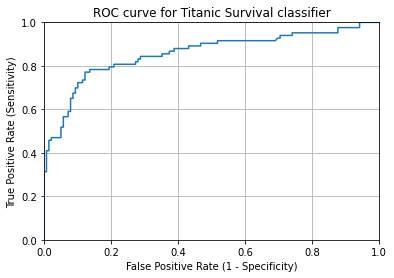

In [51]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Titanic Survival classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### AUC - percentage of the ROC plot that is under the curve

A perfect model would have AUC = 1.

In [52]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8572852561324434
